## Setup and load data

In [1]:
# Required Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.utils import resample
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load datasets
train_file = 'census_income_learn.csv'
test_file = 'census_income_test.csv'

train_data = pd.read_csv(train_file, header=None)
test_data = pd.read_csv(test_file, header=None)

# Add headers based on metadata file
headers = [
    "age", "class_of_worker", "detailed_industry_recode", "detailed_occupation_recode",
    "education", "wage_per_hour", "enroll_in_edu_inst_last_wk", "marital_status",
    "major_industry_code", "major_occupation_code", "race", "hispanic_origin", "sex",
    "member_of_labor_union", "reason_for_unemployment", "full_or_part_time_employment_stat",
    "capital_gains", "capital_losses", "dividends_from_stocks", "tax_filer_status",
    "region_of_previous_residence", "state_of_previous_residence",
    "detailed_household_and_family_stat", "detailed_household_summary_in_household",
    "instance_weight", "migration_code_change_in_msa", "migration_code_change_in_reg",
    "migration_code_move_within_reg", "live_in_this_house_1_year_ago",
    "migration_prev_res_in_sunbelt", "num_persons_worked_for_employer", "family_members_under_18",
    "country_of_birth_father", "country_of_birth_mother", "country_of_birth_self",
    "citizenship", "own_business_or_self_employed", "fill_inc_questionnaire_for_veterans_admin",
    "veterans_benefits", "weeks_worked_in_year", "year", "income_level"
]
train_data.columns = headers
test_data.columns = headers


## Explore Data

#### View Data

In [3]:
train_data.head()

,age,class_of_worker,detailed_industry_recode,detailed_occupation_recode,education,wage_per_hour,enroll_in_edu_inst_last_wk,marital_status,major_industry_code,major_occupation_code,...,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,fill_inc_questionnaire_for_veterans_admin,veterans_benefits,weeks_worked_in_year,year,income_level
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


In [4]:
train_data.describe()

,age,detailed_industry_recode,detailed_occupation_recode,wage_per_hour,capital_gains,capital_losses,dividends_from_stocks,instance_weight,num_persons_worked_for_employer,own_business_or_self_employed,veterans_benefits,weeks_worked_in_year,year
count,199523.000000,199523.000000,199523.000000,199523.000000,199523.00000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000
mean,34.494199,15.352320,11.306556,55.426908,434.71899,37.313788,197.529533,1740.380269,1.956180,0.175438,1.514833,23.174897,94.499672
std,22.310895,18.067129,14.454204,274.896454,4697.53128,271.896428,1984.163658,993.768156,2.365126,0.553694,0.851473,24.411488,0.500001
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,37.870000,0.000000,0.000000,0.000000,0.000000,94.000000
25%,15.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1061.615000,0.000000,0.000000,2.000000,0.000000,94.000000
50%,33.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1618.310000,1.000000,0.000000,2.000000,8.000000,94.000000
75%,50.000000,33.000000,26.000000,0.000000,0.00000,0.000000,0.000000,2188.610000,4.000000,0.000000,2.000000,52.000000,95.000000
max,90.000000,51.000000,46.000000,9999.000000,99999.00000,4608.000000,99999.000000,18656.300000,6.000000,2.000000,2.000000,52.000000,95.000000


In [5]:
# Summary statistics for true numerical columns
true_numerical_features = [
    "age", "wage_per_hour", "capital_gains", "capital_losses",
    "dividends_from_stocks", "weeks_worked_in_year"
]
print("Numerical Summary (True Numerical Features):\n", train_data[true_numerical_features].describe())

Numerical Summary (True Numerical Features):
                  age  wage_per_hour  capital_gains  capital_losses  \
count  199523.000000  199523.000000   199523.00000   199523.000000   
mean       34.494199      55.426908      434.71899       37.313788   
std        22.310895     274.896454     4697.53128      271.896428   
min         0.000000       0.000000        0.00000        0.000000   
25%        15.000000       0.000000        0.00000        0.000000   
50%        33.000000       0.000000        0.00000        0.000000   
75%        50.000000       0.000000        0.00000        0.000000   
max        90.000000    9999.000000    99999.00000     4608.000000   

       dividends_from_stocks  weeks_worked_in_year  
count          199523.000000         199523.000000  
mean              197.529533             23.174897  
std              1984.163658             24.411488  
min                 0.000000              0.000000  
25%                 0.000000              0.000000  
50%  

### Check dataset balance, unique values and data types

In [6]:
# Checking target class balance
class_count = train_data['income_level'].value_counts()
class_balance = train_data['income_level'].value_counts(normalize=True) * 100
print(class_count)
print(class_balance)

income_level
 - 50000.    187141
 50000+.      12382
Name: count, dtype: int64
income_level
 - 50000.    93.794199
 50000+.      6.205801
Name: proportion, dtype: float64


In [7]:
### Training data ###
# Loop through each column and print unique values
for column in train_data.columns:
    unique_values = train_data[column].unique()
    print(f"Column: {column}")
    print(f"Number of Unique Values: {len(unique_values)}")
    print(f"Unique Values: {unique_values}")
    print("-" * 50)

Column: age
Number of Unique Values: 91
Unique Values: [73 58 18  9 10 48 42 28 47 34  8 32 51 46 26 13 39 16 35 12 27 56 55  2
  1 37  4 63 25 81 11 30  7 66 84 52  5 36 72 61 41 90 49  6  0 33 57 50
 24 17 53 40 54 22 29 85 38 76 21 31 74 19 15  3 43 68 71 45 62 23 69 75
 44 59 60 64 65 70 67 78 20 14 83 86 89 77 79 82 80 87 88]
--------------------------------------------------
Column: class_of_worker
Number of Unique Values: 9
Unique Values: [' Not in universe' ' Self-employed-not incorporated' ' Private'
 ' Local government' ' Federal government' ' Self-employed-incorporated'
 ' State government' ' Never worked' ' Without pay']
--------------------------------------------------
Column: detailed_industry_recode
Number of Unique Values: 52
Unique Values: [ 0  4 40 34 43 37 24 39 12 35 45  3 19 29 32 48 33 23 44 36 31 30 41  5
 11  9 42  6 18 50  2  1 26 47 16 14 22 17  7  8 25 46 27 15 13 49 38 21
 28 20 51 10]
--------------------------------------------------
Column: detailed_occu

In [8]:
### Test Set ###
# Loop through each column and print unique values
for column in test_data.columns:
    unique_values = test_data[column].unique()
    print(f"Column: {column}")
    print(f"Number of Unique Values: {len(unique_values)}")
    print(f"Unique Values: {unique_values}")
    print("-" * 50)

Column: age
Number of Unique Values: 91
Unique Values: [38 44  2 35 49 13  1 61  7 30 85 33 26 46 19 11 23 27  8 29 40 24 45 41
 14 73 78 81 15 68 28 54 37 82 55 77 53 25  0 75 80 10 22 43 48  5 16 18
 50 64  3 72 47 39 51 12 67 59 42  4 32 83 57  6 60 34 20 21 76 71 31 17
 63  9 56 36 65 69 70 62 58 66 74 90 79 89 52 84 87 86 88]
--------------------------------------------------
Column: class_of_worker
Number of Unique Values: 9
Unique Values: [' Private' ' Self-employed-not incorporated' ' Not in universe'
 ' Local government' ' State government' ' Never worked'
 ' Self-employed-incorporated' ' Federal government' ' Without pay']
--------------------------------------------------
Column: detailed_industry_recode
Number of Unique Values: 52
Unique Values: [ 6 37  0 29  4 45 30 36 33 42 40 47 32 21 35 43 39 22  2 24 38 13 41 34
 15 31  9 12  1 48 19 11 14  8 44 18  7 50 23 27 25 49  3  5 46 16 17 28
 51 20 26 10]
--------------------------------------------------
Column: detailed_occu

In [9]:
# Check for NaN values in each column
missing_values = train_data.isnull().sum()

# Display columns with missing values
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
age                                          0
class_of_worker                              0
detailed_industry_recode                     0
detailed_occupation_recode                   0
education                                    0
wage_per_hour                                0
enroll_in_edu_inst_last_wk                   0
marital_status                               0
major_industry_code                          0
major_occupation_code                        0
race                                         0
hispanic_origin                              0
sex                                          0
member_of_labor_union                        0
reason_for_unemployment                      0
full_or_part_time_employment_stat            0
capital_gains                                0
capital_losses                               0
dividends_from_stocks                        0
tax_filer_status                             0
region_of_previous_residence 

In [10]:
# Check for NaN values in each column
missing_values = test_data.isnull().sum()

# Display columns with missing values
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
age                                          0
class_of_worker                              0
detailed_industry_recode                     0
detailed_occupation_recode                   0
education                                    0
wage_per_hour                                0
enroll_in_edu_inst_last_wk                   0
marital_status                               0
major_industry_code                          0
major_occupation_code                        0
race                                         0
hispanic_origin                              0
sex                                          0
member_of_labor_union                        0
reason_for_unemployment                      0
full_or_part_time_employment_stat            0
capital_gains                                0
capital_losses                               0
dividends_from_stocks                        0
tax_filer_status                             0
region_of_previous_residence 

In [11]:
# Count occurrences of '?' in each column
question_mark_counts = (train_data == ' ?').sum()

# Display the counts
print("Number of '?' in each column:")
print(question_mark_counts)

Number of '?' in each column:
age                                              0
class_of_worker                                  0
detailed_industry_recode                         0
detailed_occupation_recode                       0
education                                        0
wage_per_hour                                    0
enroll_in_edu_inst_last_wk                       0
marital_status                                   0
major_industry_code                              0
major_occupation_code                            0
race                                             0
hispanic_origin                                  0
sex                                              0
member_of_labor_union                            0
reason_for_unemployment                          0
full_or_part_time_employment_stat                0
capital_gains                                    0
capital_losses                                   0
dividends_from_stocks                            0
t

In [12]:
# Count occurrences of '?' in each column
question_mark_counts = (test_data == ' ?').sum()

# Display the counts
print("Number of '?' in each column:")
print(question_mark_counts)

Number of '?' in each column:
age                                              0
class_of_worker                                  0
detailed_industry_recode                         0
detailed_occupation_recode                       0
education                                        0
wage_per_hour                                    0
enroll_in_edu_inst_last_wk                       0
marital_status                                   0
major_industry_code                              0
major_occupation_code                            0
race                                             0
hispanic_origin                                  0
sex                                              0
member_of_labor_union                            0
reason_for_unemployment                          0
full_or_part_time_employment_stat                0
capital_gains                                    0
capital_losses                                   0
dividends_from_stocks                            0
t

In [13]:
# Drop the following columns from both train and test data, due to large number of missing data
columns_to_drop = [
    'migration_code_change_in_msa',
    'migration_code_change_in_reg',
    'migration_code_move_within_reg',
    'migration_prev_res_in_sunbelt'
]

train_data = train_data.drop(columns=columns_to_drop)
test_data = test_data.drop(columns=columns_to_drop)

In [14]:
# Dropping instance_weight for simplicity
train_data = train_data.drop(columns='instance_weight')
test_data = test_data.drop(columns='instance_weight')

In [15]:
print(len(train_data.columns))
print(len(test_data.columns))

37
37


In [16]:
# Lower number of '?' in the columns below, convert feature value from '?' to 'unknown'
columns_to_convert = [
    'country_of_birth_father',
    'country_of_birth_mother',
    'country_of_birth_self',
    'state_of_previous_residence'
]

# Replace '?' with 'Unknown' in the columns specified above
train_data[columns_to_convert] = train_data[columns_to_convert].replace(' ?', ' Unknown')
test_data[columns_to_convert] = test_data[columns_to_convert].replace(' ?', ' Unknown')

# Verify the replacement
for col in columns_to_convert:
    print(f"Unique values in {col} after conversion:")
    print(train_data[col].unique())
    print("-" * 50)

Unique values in country_of_birth_father after conversion:
[' United-States' ' Vietnam' ' Philippines' ' Unknown' ' Columbia'
 ' Germany' ' Mexico' ' Japan' ' Peru' ' Dominican-Republic'
 ' South Korea' ' Cuba' ' El-Salvador' ' Canada' ' Scotland'
 ' Outlying-U S (Guam USVI etc)' ' Italy' ' Guatemala' ' Ecuador'
 ' Puerto-Rico' ' Cambodia' ' China' ' Poland' ' Nicaragua' ' Taiwan'
 ' England' ' Ireland' ' Hungary' ' Yugoslavia' ' Trinadad&Tobago'
 ' Jamaica' ' Honduras' ' Portugal' ' Iran' ' France' ' India'
 ' Hong Kong' ' Haiti' ' Greece' ' Holand-Netherlands' ' Thailand' ' Laos'
 ' Panama']
--------------------------------------------------
Unique values in country_of_birth_mother after conversion:
[' United-States' ' Vietnam' ' Unknown' ' Columbia' ' Mexico'
 ' El-Salvador' ' Peru' ' Puerto-Rico' ' Cuba' ' Philippines'
 ' Dominican-Republic' ' Germany' ' England' ' Guatemala' ' Scotland'
 ' Portugal' ' Italy' ' Ecuador' ' Yugoslavia' ' China' ' Poland'
 ' Hungary' ' Nicaragua' ' Ta

In [17]:
# Remove duplicate values
num_duplicates = train_data.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

train_data = train_data.drop_duplicates()

Number of duplicate rows: 47155


## Model Training 
#### (To train model, restart kernel, run cells up to this point. Choose model to train.)

In [18]:
# Check train count after data clean-up
train_data["income_level"].value_counts()

income_level
 - 50000.    140001
 50000+.      12367
Name: count, dtype: int64

### Balanced (undersampling majority class)

In [19]:
# 1. Separate Majority and Minority Classes for Balancing

# Encode the target column
train_data['income_level'] = train_data['income_level'].map({' - 50000.': 0, ' 50000+.': 1})
test_data['income_level'] = test_data['income_level'].map({' - 50000.': 0, ' 50000+.': 1})
# Separate majority and minority classes for balancing
minority = train_data[train_data['income_level'] == 1]
majority = train_data[train_data['income_level'] == 0]

# Undersample the majority class
majority_undersampled = resample(majority, 
                                 replace=False,    # No replacement
                                 n_samples=len(minority),  # Match minority size
                                 random_state=42)  # Reproducibility

# Combine undersampled majority with the minority class
balanced_train = pd.concat([majority_undersampled, minority])
balanced_train = balanced_train.sample(frac=1, random_state=42).reset_index(drop=True)

# Split into features and target
X_balanced = balanced_train.drop(columns=['income_level'])
y_balanced = balanced_train['income_level']

# Train-validation split
X_train_balanced, X_val_balanced, y_train_balanced, y_val_balanced = train_test_split(
    X_balanced, y_balanced, test_size=0.2, stratify=y_balanced, random_state=42)

# 3. Define Preprocessing Pipeline
# Identify categorical and numerical columns
numerical_features = [
    "age", "wage_per_hour", "capital_gains", "capital_losses",
    "dividends_from_stocks", "weeks_worked_in_year"]
categorical_features = list(set(X_train_balanced.columns) - set(numerical_features))

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),  # Handle missing numerical values
            ('scaler', StandardScaler())                   # Normalise numerical features
        ]), numerical_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing categorical values
            ('onehot', OneHotEncoder(handle_unknown='ignore'))     # Encode categorical features
        ]), categorical_features)
    ]
)

# 4. Define Logistic Regression Model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# 5. Train the Model
model.fit(X_train_balanced, y_train_balanced)

# 6. Evaluate on Validation Set
y_val_pred = model.predict(X_val_balanced)
y_val_proba = model.predict_proba(X_val_balanced)[:, 1]

print("Validation Classification Report:\n", classification_report(y_val_balanced, y_val_pred))
print("Validation AUC-ROC Score:", roc_auc_score(y_val_balanced, y_val_proba))

Validation Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85      2474
           1       0.85      0.86      0.85      2473

    accuracy                           0.85      4947
   macro avg       0.85      0.85      0.85      4947
weighted avg       0.85      0.85      0.85      4947

Validation AUC-ROC Score: 0.9324755050585124


##### Test Set Performance

In [21]:
# Split the test set into features (X) and target (y)
X_test_final = test_data.drop(columns=['income_level'])  # Replace 'income_level' with the target column name
y_test_final = test_data['income_level']

# Use the trained pipeline to predict on the test set
y_test_pred = model.predict(X_test_final)
y_test_proba = model.predict_proba(X_test_final)[:, 1]

# Evaluate performance on the test set
from sklearn.metrics import classification_report, roc_auc_score

print("Test Classification Report:\n", classification_report(y_test_final, y_test_pred))
print("Test AUC-ROC Score:", roc_auc_score(y_test_final, y_test_proba))

Test Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.87      0.93     93576
           1       0.31      0.87      0.46      6186

    accuracy                           0.87     99762
   macro avg       0.65      0.87      0.69     99762
weighted avg       0.95      0.87      0.90     99762

Test AUC-ROC Score: 0.945780111069678


### No balancing, using Class Weights in Logistic Regression

In [19]:
# Map target labels to binary
train_data['income_level'] = train_data['income_level'].map({' - 50000.': 0, ' 50000+.': 1})
test_data['income_level'] = test_data['income_level'].map({' - 50000.': 0, ' 50000+.': 1})

X_train = train_data.drop(columns=['income_level'])
y_train = train_data['income_level']

# 1. Split the Data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

# 2. Preprocessing Pipeline
numerical_features = [
    "age", "wage_per_hour", "capital_gains", "capital_losses",
    "dividends_from_stocks", "weeks_worked_in_year"]
categorical_features = list(set(X_train.columns) - set(numerical_features))

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),  # Handle missing values in numerical columns
            ('scaler', StandardScaler())                   # Scale numerical features
        ]), numerical_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values in categorical columns
            ('onehot', OneHotEncoder(handle_unknown='ignore'))     # Encode categorical features
        ]), categorical_features)
    ]
)

# 3. Preprocess the Data
# Fit and transform the training data, transform validation data
X_train_encoded = preprocessor.fit_transform(X_train)
X_val_encoded = preprocessor.transform(X_val)

# 4. Train Logistic Regression with Class Weights
# Using 'balanced' class weights
model = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
model.fit(X_train_encoded, y_train)

# 5. Evaluate on Validation Set
y_val_pred = model.predict(X_val_encoded)
y_val_proba = model.predict_proba(X_val_encoded)[:, 1]

# Validation Metrics
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))
print("Validation AUC-ROC Score:", roc_auc_score(y_val, y_val_proba))

Validation Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.84      0.91     28001
           1       0.32      0.86      0.47      2473

    accuracy                           0.84     30474
   macro avg       0.65      0.85      0.69     30474
weighted avg       0.93      0.84      0.87     30474

Validation AUC-ROC Score: 0.926587459551911
Test Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.88      0.93     93576
           1       0.32      0.87      0.47      6186

    accuracy                           0.88     99762
   macro avg       0.65      0.87      0.70     99762
weighted avg       0.95      0.88      0.90     99762

Test AUC-ROC Score: 0.9464890652116607


### Logistic Regression using SMOTE

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE


train_data['income_level'] = train_data['income_level'].map({' - 50000.': 0, ' 50000+.': 1})
test_data['income_level'] = test_data['income_level'].map({' - 50000.': 0, ' 50000+.': 1})

X_train = train_data.drop(columns=['income_level'])
y_train = train_data['income_level']

# 1. Split the Data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

# 2. Preprocessing Pipeline
# Identify categorical and numerical features
numerical_features = [
    "age", "wage_per_hour", "capital_gains", "capital_losses",
    "dividends_from_stocks", "weeks_worked_in_year"]
categorical_features = list(set(X_train.columns) - set(numerical_features))

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),  # Handle missing values in numerical columns
            ('scaler', StandardScaler())                   # Scale numerical features
        ]), numerical_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values in categorical columns
            ('onehot', OneHotEncoder(handle_unknown='ignore'))     # Encode categorical features
        ]), categorical_features)
    ]
)

# 3. Preprocess the Data
# Fit and transform the training data, transform validation data
X_train_encoded = preprocessor.fit_transform(X_train)
X_val_encoded = preprocessor.transform(X_val)

# 4. Apply SMOTE
# Oversample the minority class in the training data
smote = SMOTE(sampling_strategy=0.75, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_encoded, y_train)

print("Class distribution after SMOTE:\n", y_train_smote.value_counts())

# 5. Train Logistic Regression
# Define and train the logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_smote, y_train_smote)

# 6. Evaluate on Validation Set
# Predict and calculate probabilities
y_val_pred = model.predict(X_val_encoded)
y_val_proba = model.predict_proba(X_val_encoded)[:, 1]

# Print metrics
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))
print("Validation AUC-ROC Score:", roc_auc_score(y_val, y_val_proba))

Class distribution after SMOTE:
 income_level
0    112000
1     84000
Name: count, dtype: int64
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.87      0.92     28001
           1       0.36      0.81      0.50      2473

    accuracy                           0.87     30474
   macro avg       0.67      0.84      0.71     30474
weighted avg       0.93      0.87      0.89     30474

Validation AUC-ROC Score: 0.9246867706893893


In [ ]:
# Logistic Regression pipeline with class_weight
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42))
])

# Fit the model on the imbalanced training data
model.fit(X_train, y_train)

In [24]:
# Validation set evaluation
y_val_pred = model.predict(X_val)
y_val_proba = model.predict_proba(X_val)[:, 1]

print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))
print("Validation AUC-ROC Score:", roc_auc_score(y_val, y_val_proba))

Validation Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.83      0.90     28001
           1       0.31      0.86      0.46      2473

    accuracy                           0.84     30474
   macro avg       0.65      0.85      0.68     30474
weighted avg       0.93      0.84      0.87     30474

Validation AUC-ROC Score: 0.9250198706871323


### Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Map target labels to binary
train_data['income_level'] = train_data['income_level'].map({' - 50000.': 0, ' 50000+.': 1})
test_data['income_level'] = test_data['income_level'].map({' - 50000.': 0, ' 50000+.': 1})

X_train = train_data.drop(columns=['income_level'])
y_train = train_data['income_level']

# 1. Split the Data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

# 2. Preprocessing Pipeline
numerical_features = [
    "age", "wage_per_hour", "capital_gains", "capital_losses",
    "dividends_from_stocks", "weeks_worked_in_year"]
categorical_features = list(set(X_train.columns) - set(numerical_features))

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),  # Handle missing values in numerical columns
            ('scaler', StandardScaler())                   # Scale numerical features
        ]), numerical_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values in categorical columns
            ('onehot', OneHotEncoder(handle_unknown='ignore'))     # Encode categorical features
        ]), categorical_features)
    ]
)

# Preprocess the Data
X_train_encoded = preprocessor.fit_transform(X_train)
X_val_encoded = preprocessor.transform(X_val)

# 3. Train Random Forest Model
# Using class_weight='balanced' to address class imbalance
rf_model = RandomForestClassifier(
    n_estimators=100, random_state=42, class_weight='balanced', max_depth=None
)
rf_model.fit(X_train_encoded, y_train)

# 4. Evaluate on Validation Set
y_val_pred = rf_model.predict(X_val_encoded)
y_val_proba = rf_model.predict_proba(X_val_encoded)[:, 1]

print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))
print("Validation AUC-ROC Score:", roc_auc_score(y_val, y_val_proba))

Validation Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     28001
           1       0.72      0.37      0.49      2473

    accuracy                           0.94     30474
   macro avg       0.83      0.68      0.73     30474
weighted avg       0.93      0.94      0.93     30474

Validation AUC-ROC Score: 0.9196454308943648


In [26]:
from sklearn.ensemble import RandomForestClassifier


# Update the pipeline to use Random Forest
model_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42))
])

# Train on the original imbalanced dataset
model_rf.fit(X_train, y_train)

# Evaluate on the validation set
y_val_pred_rf = model_rf.predict(X_val)
y_val_proba_rf = model_rf.predict_proba(X_val)[:, 1]

print("Validation Classification Report:\n", classification_report(y_val, y_val_pred_rf))
print("Validation AUC-ROC Score:", roc_auc_score(y_val, y_val_proba_rf))

Validation Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     28001
           1       0.73      0.37      0.49      2473

    accuracy                           0.94     30474
   macro avg       0.84      0.68      0.73     30474
weighted avg       0.93      0.94      0.93     30474

Validation AUC-ROC Score: 0.9183519570736838


In [28]:
from xgboost import XGBClassifier

# Train an XGBoost model
model_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]),
                                 n_estimators=100, random_state=42))
])

model_xgb.fit(X_train, y_train)

# Evaluate on the validation set
y_val_pred_xgb = model_xgb.predict(X_val)
y_val_proba_xgb = model_xgb.predict_proba(X_val)[:, 1]

print("Validation Classification Report:\n", classification_report(y_val, y_val_pred_xgb))
print("Validation AUC-ROC Score:", roc_auc_score(y_val, y_val_proba_xgb))

XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/Users/manishpatel/Library/Python/3.9/lib/python/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: @rpath/libomp.dylib\n  Referenced from: <BBC4A126-D15A-3802-AD26-108872BA781A> /Users/manishpatel/Library/Python/3.9/lib/python/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: tried: '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file)"]


### EDA Analysis (Appendix)

In [24]:
# Load datasets
train_file = 'census_income_learn.csv'
test_file = 'census_income_test.csv'

train_data = pd.read_csv(train_file, header=None)
test_data = pd.read_csv(test_file, header=None)

# Add headers based on metadata file
headers = [
    "age", "class_of_worker", "detailed_industry_recode", "detailed_occupation_recode",
    "education", "wage_per_hour", "enroll_in_edu_inst_last_wk", "marital_status",
    "major_industry_code", "major_occupation_code", "race", "hispanic_origin", "sex",
    "member_of_labor_union", "reason_for_unemployment", "full_or_part_time_employment_stat",
    "capital_gains", "capital_losses", "dividends_from_stocks", "tax_filer_status",
    "region_of_previous_residence", "state_of_previous_residence",
    "detailed_household_and_family_stat", "detailed_household_summary_in_household",
    "instance_weight", "migration_code_change_in_msa", "migration_code_change_in_reg",
    "migration_code_move_within_reg", "live_in_this_house_1_year_ago",
    "migration_prev_res_in_sunbelt", "num_persons_worked_for_employer", "family_members_under_18",
    "country_of_birth_father", "country_of_birth_mother", "country_of_birth_self",
    "citizenship", "own_business_or_self_employed", "fill_inc_questionnaire_for_veterans_admin",
    "veterans_benefits", "weeks_worked_in_year", "year", "income_level"
]
train_data.columns = headers
test_data.columns = headers

In [25]:
train_data['income_level'].value_counts()

income_level
 - 50000.    187141
 50000+.      12382
Name: count, dtype: int64

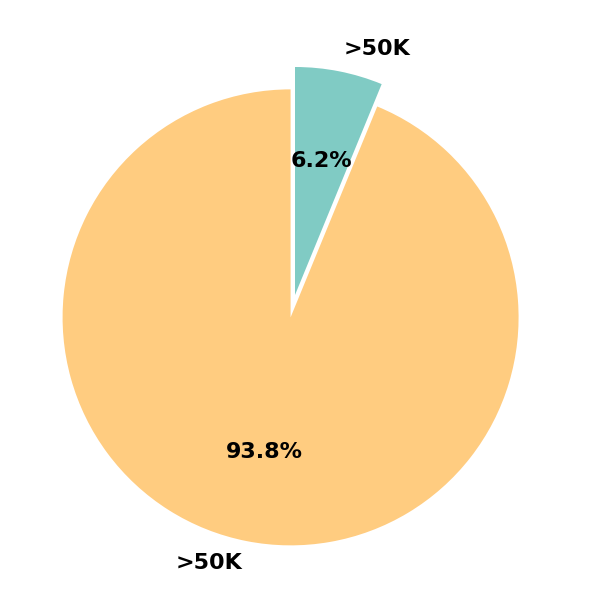

In [26]:
import matplotlib.pyplot as plt

# Dynamically compute the class distribution
class_distribution = train_data['income_level'].value_counts(normalize=True) * 100
classes = class_distribution.index.map(lambda x: '<=50K' if x == 0 else '>50K')
values = class_distribution.values

# New colors for the pie chart
colors = ['#FFCC80', '#80CBC4']  # Soft orange and teal

# Plot
plt.figure(figsize=(6, 6))
explode = (0.1, 0)  # Highlight the smaller slice
plt.pie(
    values,
    labels=classes,
    autopct='%1.1f%%',
    startangle=90,
    explode=explode,
    colors=colors,
    textprops={'fontsize': 16, 'fontweight': 'bold'}  # Bold and larger labels
)
plt.tight_layout()
plt.show()

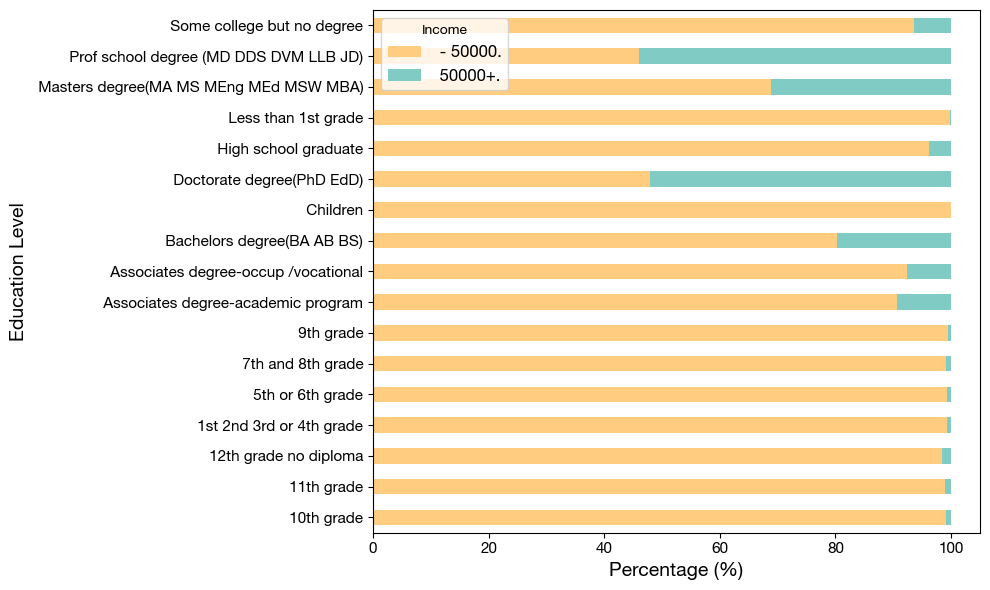

In [30]:
import seaborn as sns
import matplotlib as mpl

# Set font to Helvetica Neue
mpl.rcParams['font.family'] = 'Helvetica Neue'

# Grouped bar chart for income by education
grouped = train_data.groupby(['education', 'income_level']).size().unstack()

# Group the data and normalize within each education level
normalized_grouped = grouped.div(grouped.sum(axis=1), axis=0) * 100
# Plot normalized horizontal stacked bar chart
normalized_grouped.plot(kind='barh', stacked=True, figsize=(10, 6), color=['#FFCC80', '#80CBC4'])
# plt.title('Income Proportion by Education Level', fontsize=14)
plt.xlabel('Percentage (%)', fontsize=14)
plt.ylabel('Education Level', fontsize=14)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.legend(title='Income', fontsize=12)
plt.tight_layout()
plt.show()

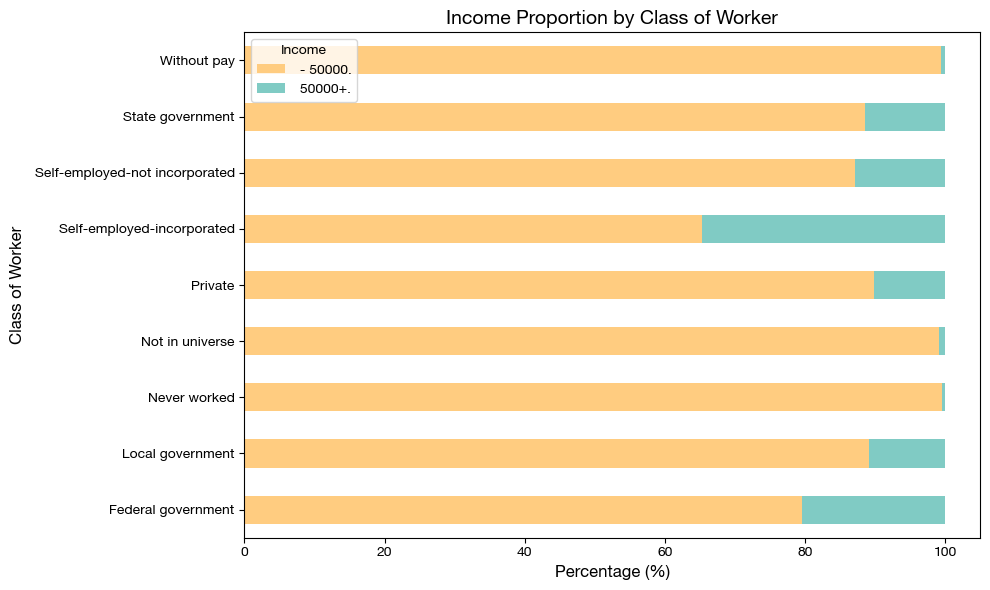

In [31]:
# Group by class_of_worker and normalize proportions
class_worker_grouped = train_data.groupby(['class_of_worker', 'income_level']).size().unstack()
normalized_worker = class_worker_grouped.div(class_worker_grouped.sum(axis=1), axis=0) * 100

# Plot
normalized_worker.plot(kind='barh', stacked=True, figsize=(10, 6), color=['#FFCC80', '#80CBC4'])
plt.title('Income Proportion by Class of Worker', fontsize=14)
plt.xlabel('Percentage (%)', fontsize=12)
plt.ylabel('Class of Worker', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Income', fontsize=10)
plt.tight_layout()
plt.show()

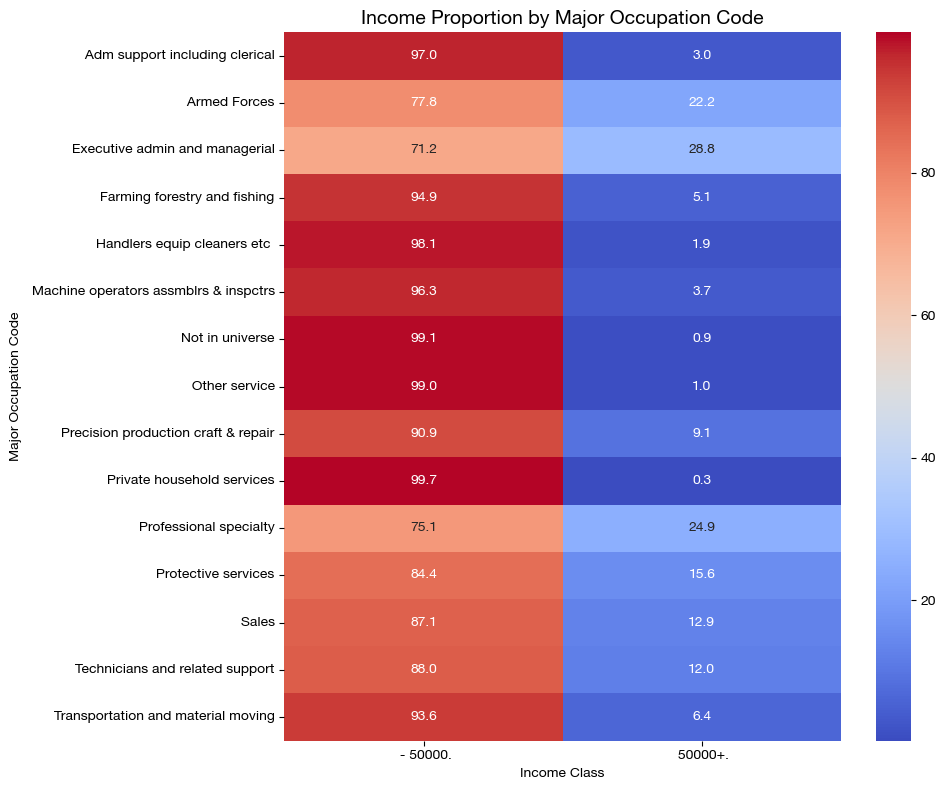

In [33]:
import seaborn as sns
import pandas as pd

# Calculate proportions
occ_proportions = train_data.groupby(['major_occupation_code', 'income_level']).size().unstack()
occ_normalized = occ_proportions.div(occ_proportions.sum(axis=1), axis=0) * 100

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(occ_normalized, annot=True, fmt=".1f", cmap="coolwarm")
plt.title('Income Proportion by Major Occupation Code', fontsize=14)
plt.xlabel('Income Class')
plt.ylabel('Major Occupation Code')
plt.tight_layout()
plt.show()

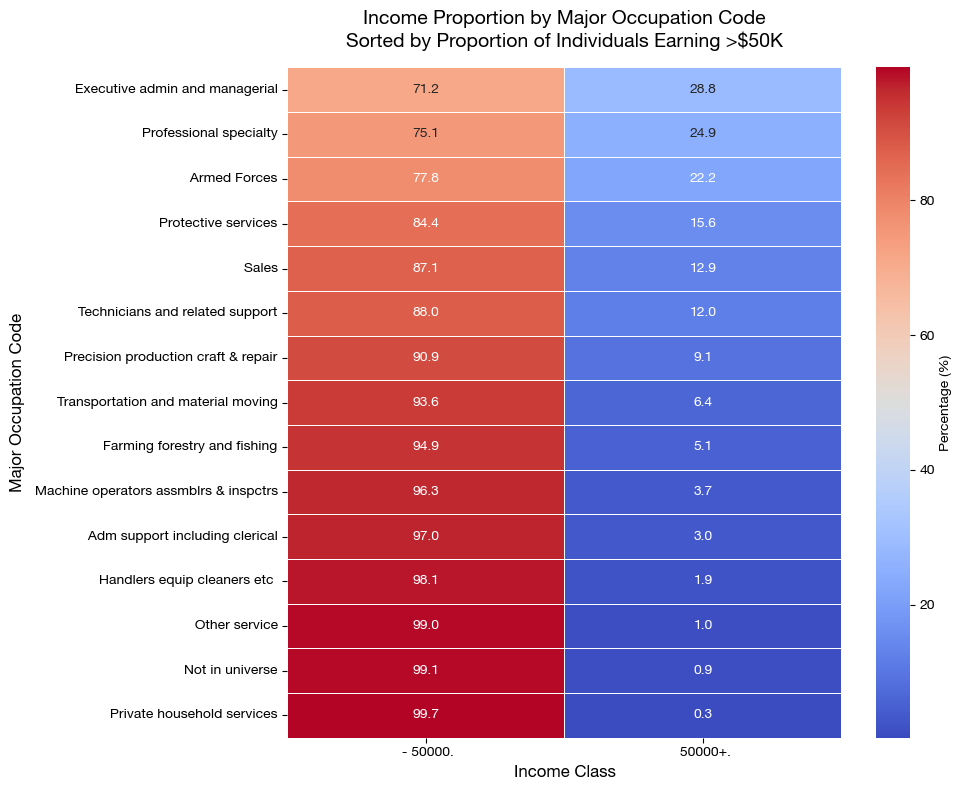

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group and normalize by occupation
occ_proportions = train_data.groupby(['major_occupation_code', 'income_level']).size().unstack()
occ_normalized = occ_proportions.div(occ_proportions.sum(axis=1), axis=0) * 100

# Sort by proportion of `>50K`
occ_normalized = occ_normalized.sort_values(by=' 50000+.', ascending=False)

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    occ_normalized,
    annot=True,
    fmt=".1f",
    cmap="coolwarm",
    cbar_kws={'label': 'Percentage (%)'},
    linewidths=0.5
)
plt.title('Income Proportion by Major Occupation Code\nSorted by Proportion of Individuals Earning >$50K', fontsize=14, pad=15)
plt.xlabel('Income Class', fontsize=12)
plt.ylabel('Major Occupation Code', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

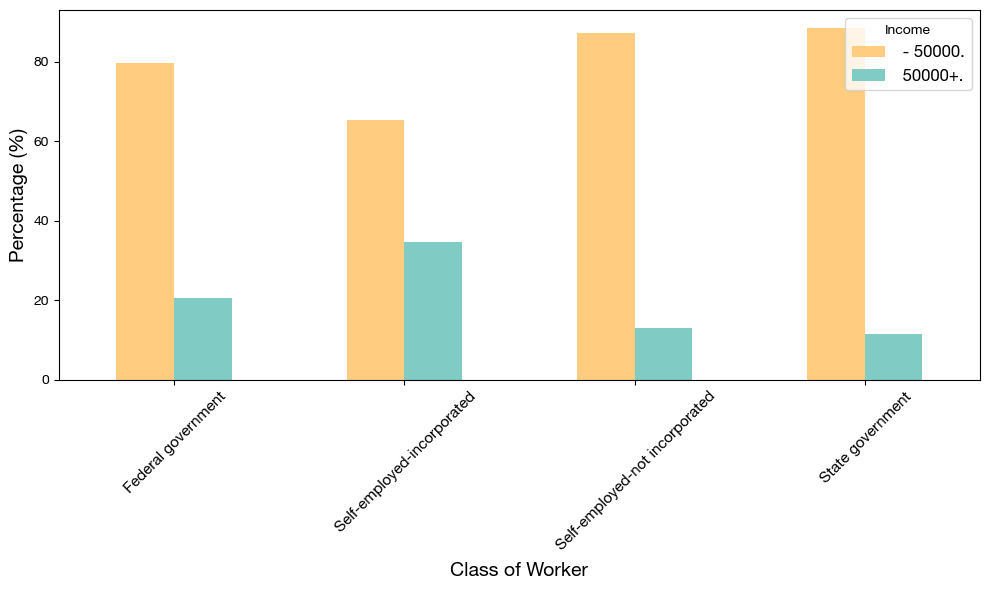

In [36]:
# Filter only self-employed and government workers
subset = train_data[train_data['class_of_worker'].isin([' Self-employed-incorporated', ' Self-employed-not incorporated', ' Federal government', ' State government'])]

mpl.rcParams['font.family'] = 'Helvetica Neue'

# Group and normalize proportions
worker_subset_grouped = subset.groupby(['class_of_worker', 'income_level']).size().unstack()
worker_normalized = worker_subset_grouped.div(worker_subset_grouped.sum(axis=1), axis=0) * 100

# Plot grouped bar chart
worker_normalized.plot(kind='bar', figsize=(10, 6), color=['#FFCC80', '#80CBC4'])
# plt.title('Income Proportion for Key Worker Types', fontsize=14)
plt.xlabel('Class of Worker', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.xticks(rotation=45, fontsize=11)
plt.legend(title='Income', fontsize=12)
plt.tight_layout()
plt.show()

/var/folders/3q/4w4846pd6h54dl_v37yqrqsc0000gn/T/ipykernel_79307/2491853786.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data, x='income_level', y='age', palette='Set2')


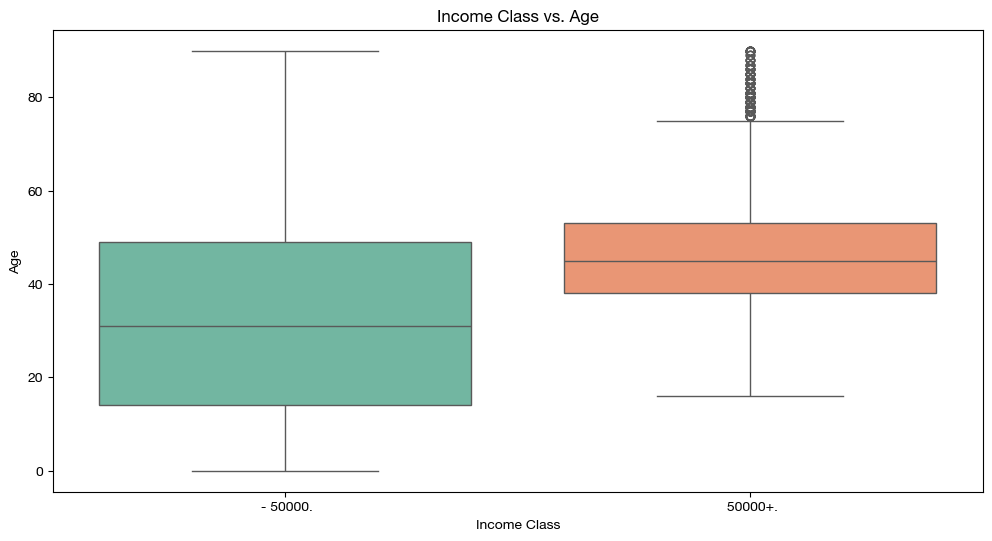

/var/folders/3q/4w4846pd6h54dl_v37yqrqsc0000gn/T/ipykernel_79307/2491853786.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Income Class')


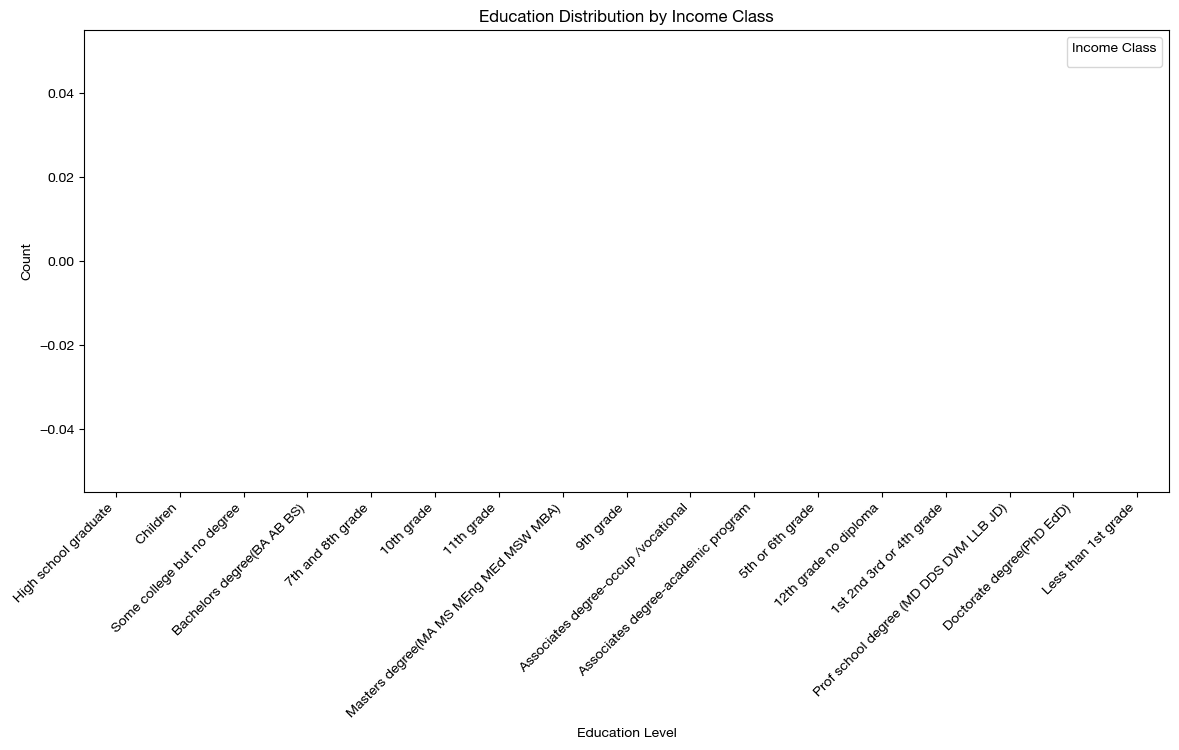

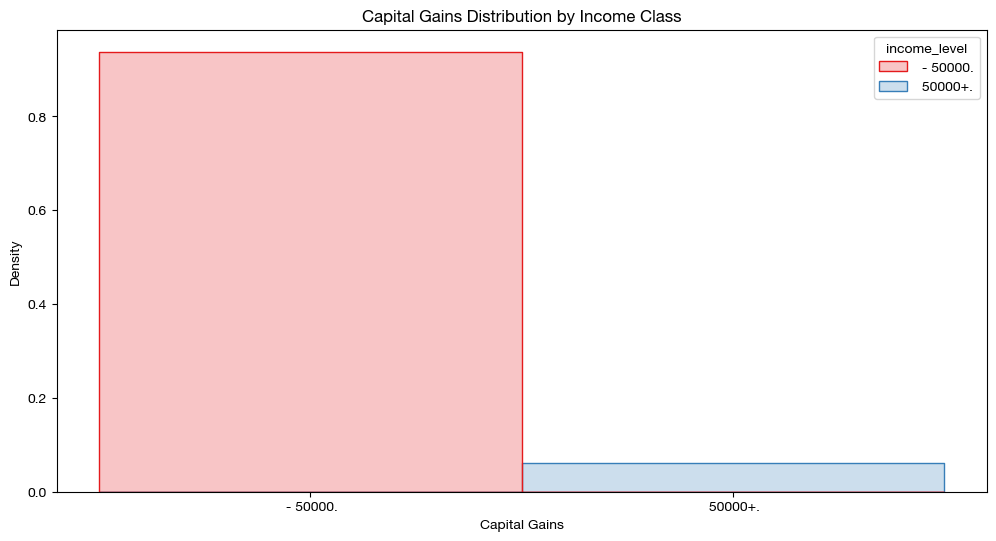

/var/folders/3q/4w4846pd6h54dl_v37yqrqsc0000gn/T/ipykernel_79307/2491853786.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data, x='income_level', y='weeks_worked_in_year', palette='Set3')


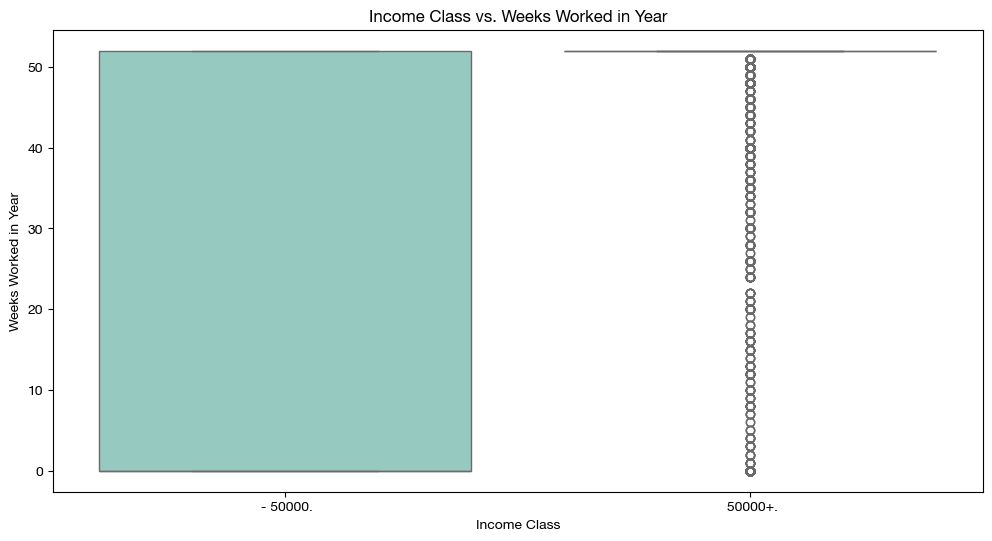

/var/folders/3q/4w4846pd6h54dl_v37yqrqsc0000gn/T/ipykernel_79307/2491853786.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data, x='capital_losses', palette='coolwarm')


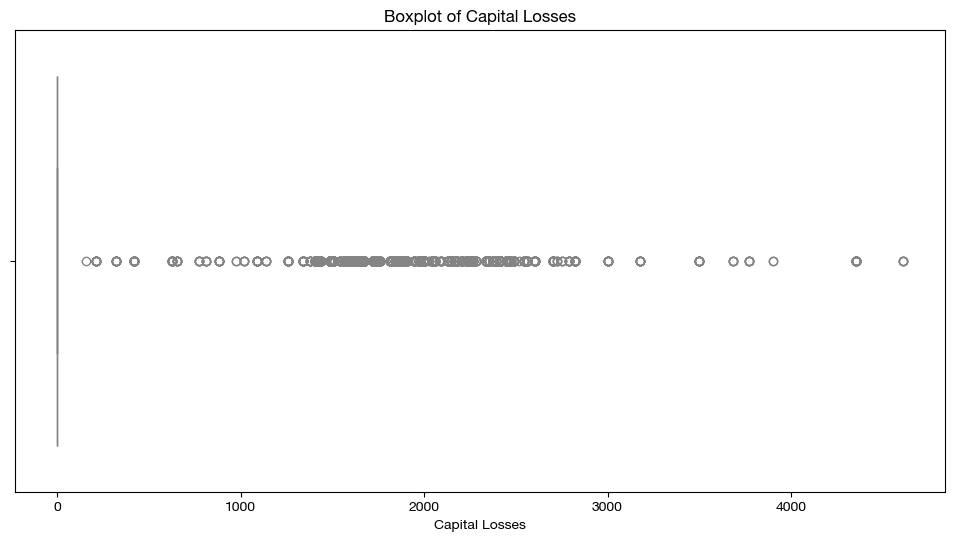

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize Feature-Target Relationships
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_data, x='income_level', y='age', palette='Set2')
plt.title('Income Class vs. Age')
plt.xlabel('Income Class')
plt.ylabel('Age')
plt.show()

# Education Distribution by Income Class
plt.figure(figsize=(14, 6))
sns.countplot(data=train_data, x='income_level', hue='income_level', order=train_data['education'].value_counts().index)
plt.title('Education Distribution by Income Class')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Income Class')
plt.show()

# Capital Gains Distribution by Income Class
plt.figure(figsize=(12, 6))
sns.histplot(data=train_data, x='income_level', hue='income_level', kde=True, bins=30, palette='Set1', element="step", stat="density")
plt.title('Capital Gains Distribution by Income Class')
plt.xlabel('Capital Gains')
plt.ylabel('Density')
plt.show()

# Weeks Worked in Year by Income Class
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_data, x='income_level', y='weeks_worked_in_year', palette='Set3')
plt.title('Income Class vs. Weeks Worked in Year')
plt.xlabel('Income Class')
plt.ylabel('Weeks Worked in Year')
plt.show()

# Outlier Analysis for Capital Losses
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_data, x='capital_losses', palette='coolwarm')
plt.title('Boxplot of Capital Losses')
plt.xlabel('Capital Losses')
plt.show()

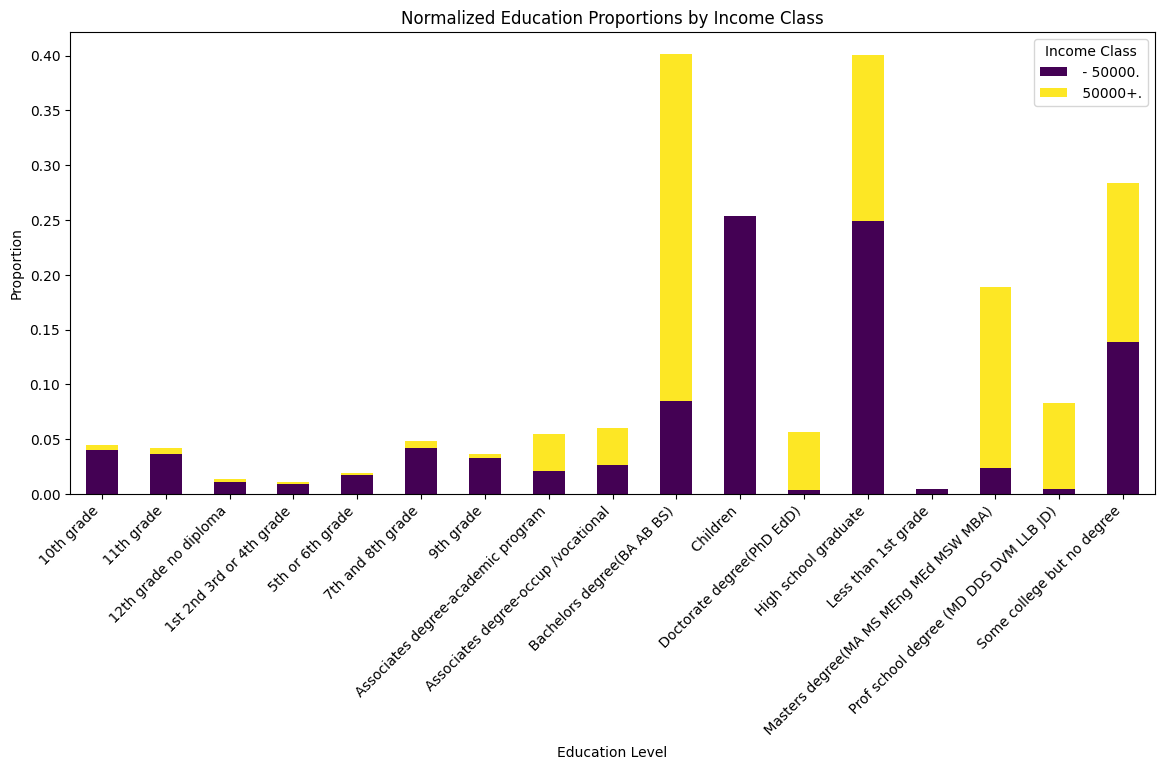

In [13]:
# Normalize counts by income class
education_proportions = (
    data.groupby(['education', 'income_class']).size()
    .div(data.groupby('income_class').size())
    .unstack()
)

# Plot normalized proportions
education_proportions.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='viridis')
plt.title('Normalized Education Proportions by Income Class')
plt.xlabel('Education Level')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Income Class')
plt.show()

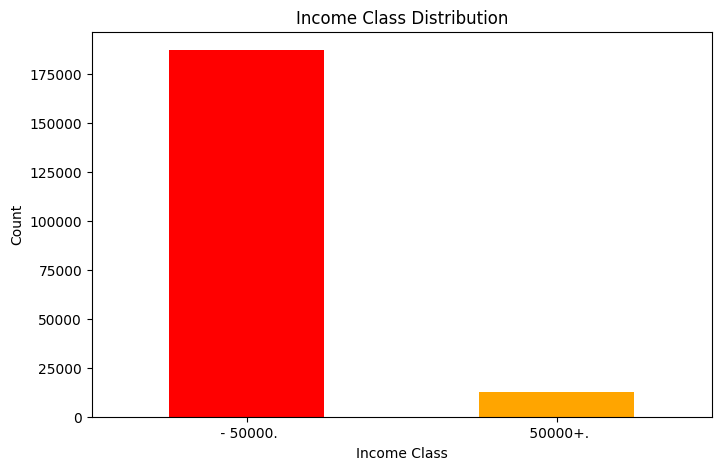

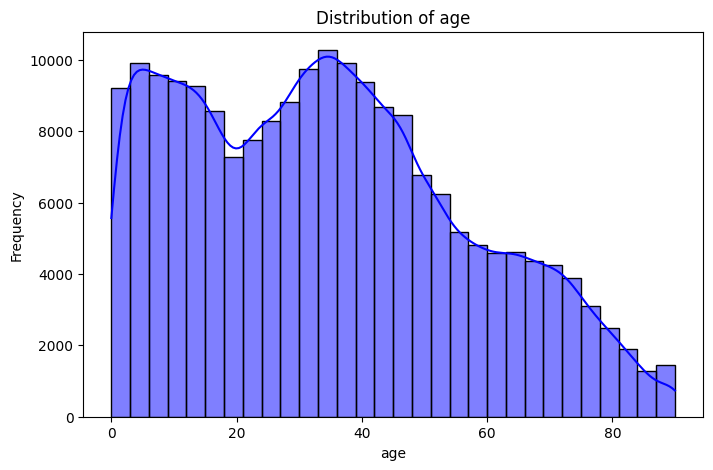

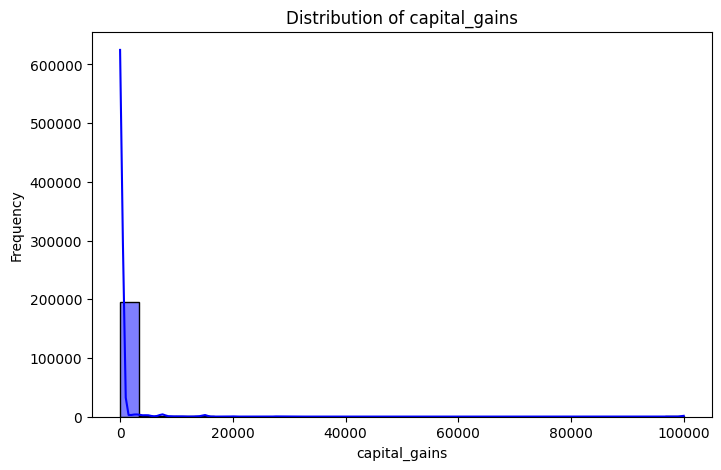

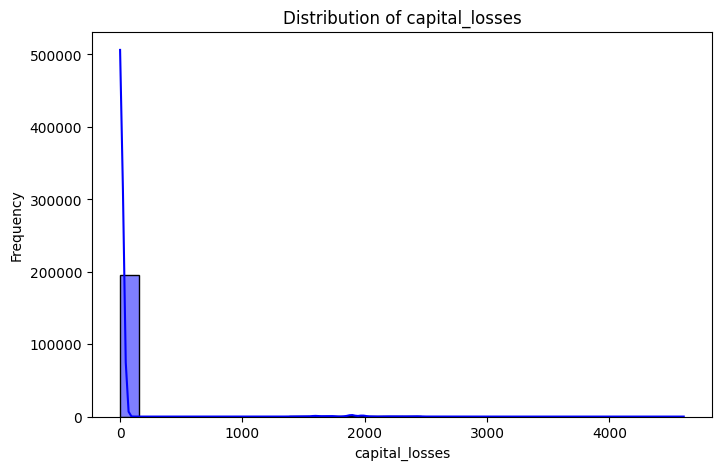

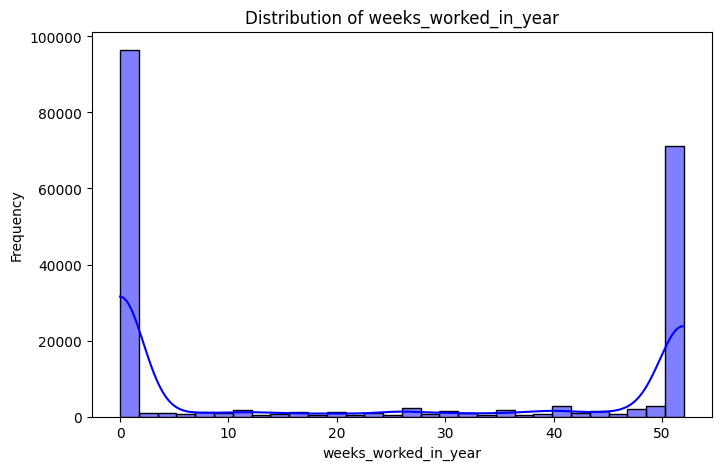

/var/folders/3q/4w4846pd6h54dl_v37yqrqsc0000gn/T/ipykernel_58863/300915061.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=feature, order=data[feature].value_counts().index, palette='viridis')


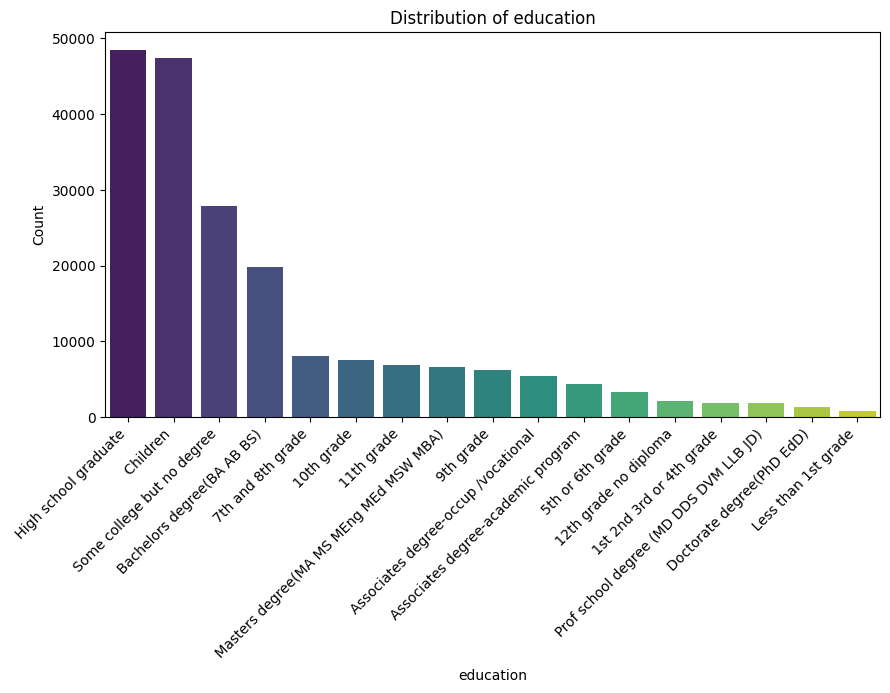

/var/folders/3q/4w4846pd6h54dl_v37yqrqsc0000gn/T/ipykernel_58863/300915061.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=feature, order=data[feature].value_counts().index, palette='viridis')


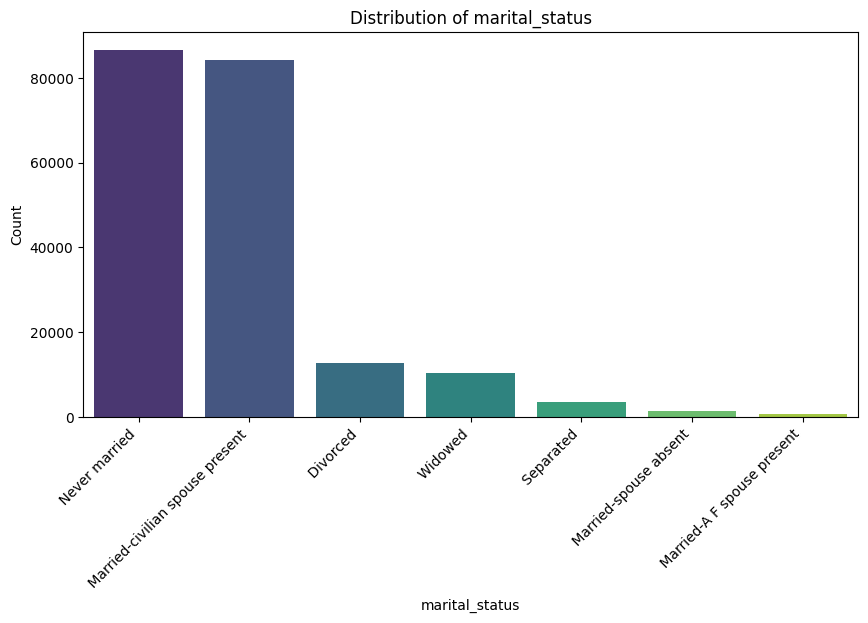

/var/folders/3q/4w4846pd6h54dl_v37yqrqsc0000gn/T/ipykernel_58863/300915061.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='income_class', y='capital_gains', palette='Set2')


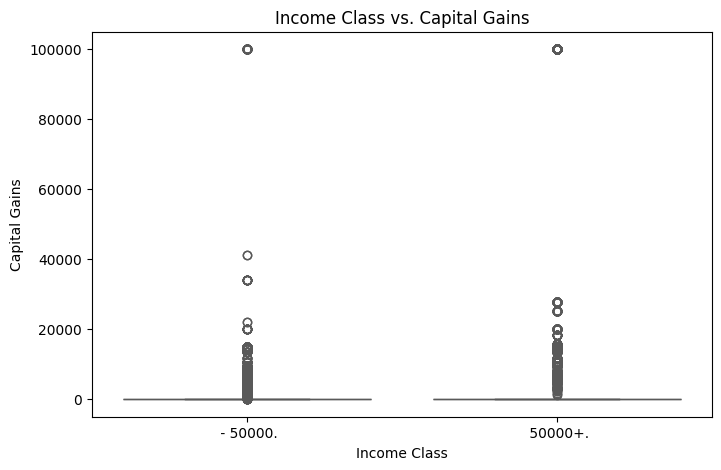

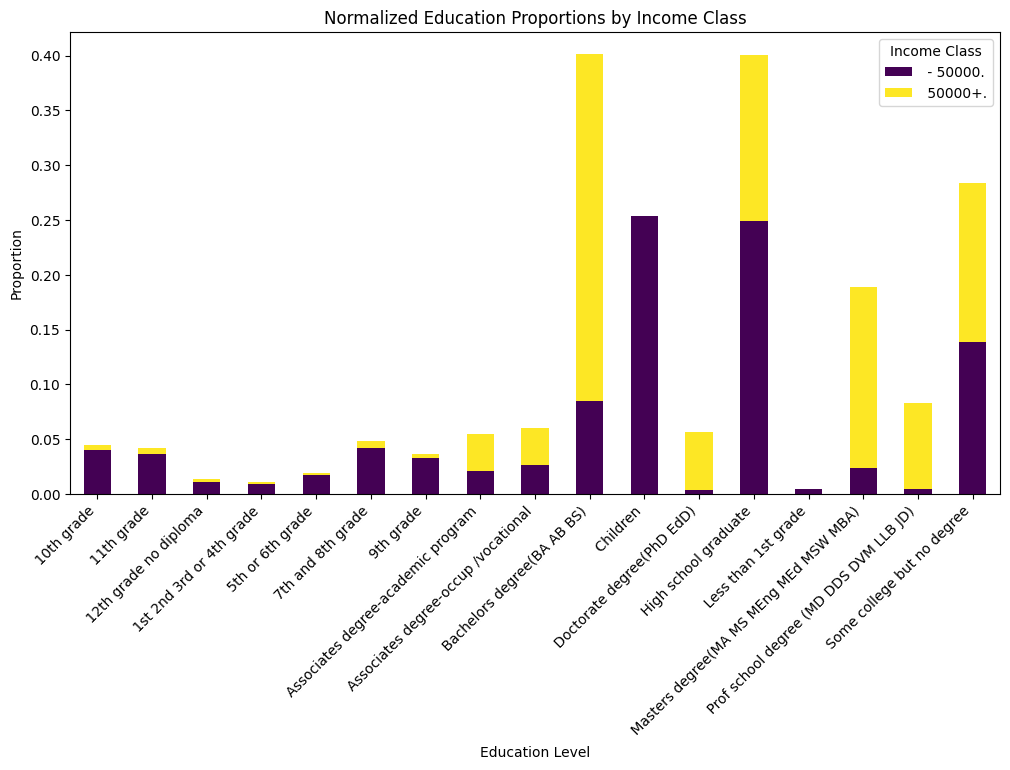

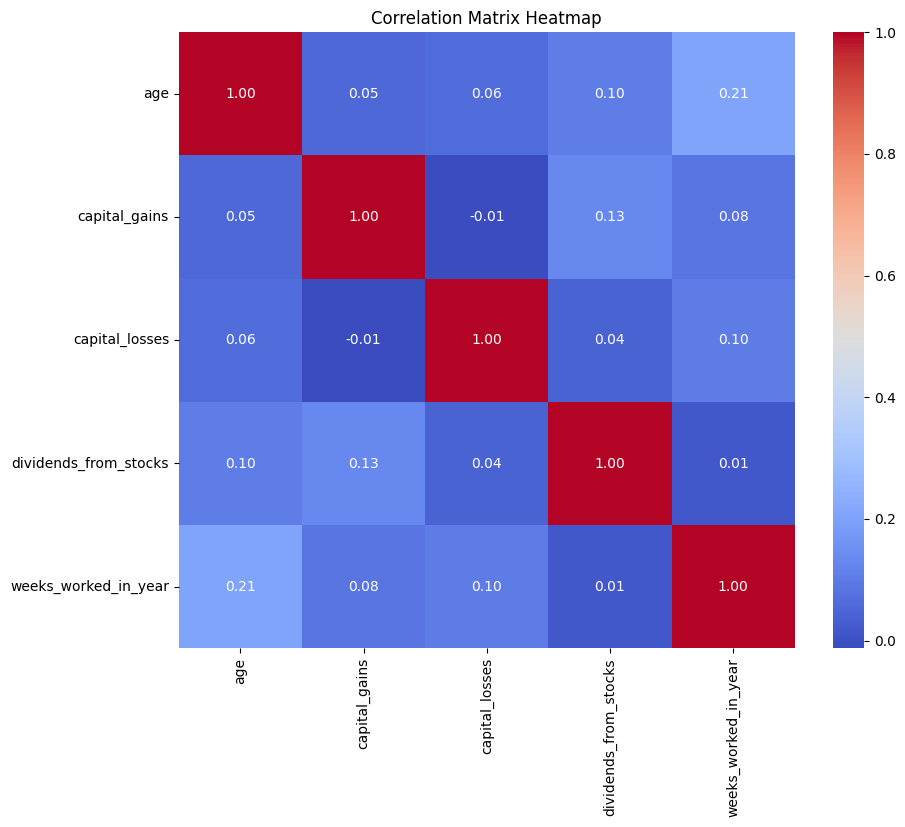

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset and set column names
file_path = "census_income_learn.csv"  # Replace with the actual file path
columns = [
    "age", "class_of_worker", "detailed_industry_recode", "detailed_occupation_recode",
    "education", "wage_per_hour", "enroll_in_edu_inst_last_wk", "marital_status",
    "major_industry_code", "major_occupation_code", "race", "hispanic_origin", "sex",
    "member_of_labor_union", "reason_for_unemployment", "full_or_part_time_employment_stat",
    "capital_gains", "capital_losses", "dividends_from_stocks", "tax_filer_status",
    "region_of_previous_residence", "state_of_previous_residence",
    "detailed_household_and_family_stat", "detailed_household_summary_in_household",
    "instance_weight", "migration_code_change_in_msa", "migration_code_change_in_reg",
    "migration_code_move_within_reg", "live_in_this_house_1_year_ago",
    "migration_prev_res_in_sunbelt", "num_persons_worked_for_employer", "family_members_under_18",
    "country_of_birth_father", "country_of_birth_mother", "country_of_birth_self",
    "citizenship", "own_business_or_self_employed", "fill_inc_questionnaire_for_veterans_admin",
    "veterans_benefits", "weeks_worked_in_year", "year", "income_class"
]
data = pd.read_csv(file_path, header=None)
data.columns = columns

# Replace missing placeholders
data.replace('?', pd.NA, inplace=True)

# ------------------------------
# 1. Target Variable Distribution
# ------------------------------
plt.figure(figsize=(8, 5))
data['income_class'].value_counts().plot(kind='bar', color=['red', 'orange'])
plt.title('Income Class Distribution')
plt.xlabel('Income Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# ------------------------------
# 2. Key Numerical Features (Univariate Analysis)
# ------------------------------
numerical_features = ['age', 'capital_gains', 'capital_losses', 'weeks_worked_in_year']
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[feature], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# ------------------------------
# 3. Key Categorical Features (Univariate Analysis)
# ------------------------------
categorical_features = ['education', 'marital_status']
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=data, x=feature, order=data[feature].value_counts().index, palette='viridis')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.show()

# ------------------------------
# 4. Strong Features vs Target
# ------------------------------
# Numerical Features vs Target
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x='income_class', y='capital_gains', palette='Set2')
plt.title('Income Class vs. Capital Gains')
plt.xlabel('Income Class')
plt.ylabel('Capital Gains')
plt.show()

# Categorical Features vs Target
# Normalized Proportions
education_proportions = (
    data.groupby(['education', 'income_class']).size()
    .div(data.groupby('income_class').size())
    .unstack()
)
education_proportions.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Normalized Education Proportions by Income Class')
plt.xlabel('Education Level')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Income Class')
plt.show()

# ------------------------------
# 5. Correlation Heatmap
# ------------------------------
# Select numerical features only
numerical_features = ['age', 'capital_gains', 'capital_losses', 'dividends_from_stocks', 'weeks_worked_in_year']
correlation_matrix = data[numerical_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()